In [1]:
# use k-means to cluster the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from data_preprocessing import get_cleaned_data_final

In [30]:
data = get_cleaned_data_final(convert_categorical=True)
print(data.columns)
target_count = data['TARGET'].value_counts()

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


1
2
3
4
5
6
7
8
9
10


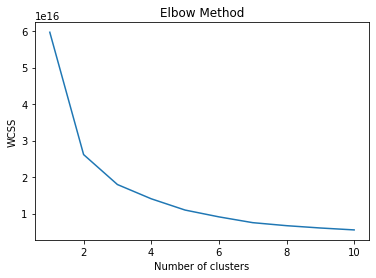

In [3]:
# use elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    print(i)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data.to_numpy())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

cluster
3    143863
2     93303
0     40246
1     30098
Name: count, dtype: int64


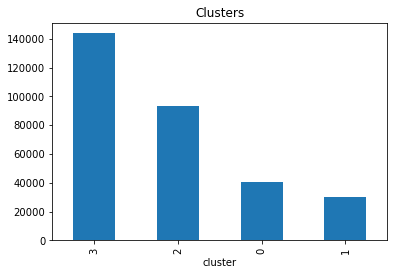

cluster
0    99584
2    98071
3    56239
4    40510
1    13106
Name: count, dtype: int64


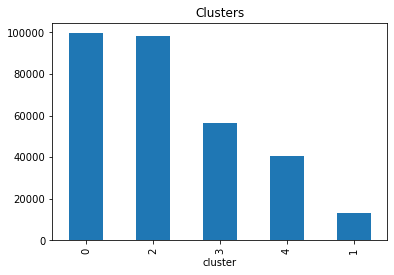

cluster
0    91249
4    75876
1    53461
3    39893
2    35910
5    11121
Name: count, dtype: int64


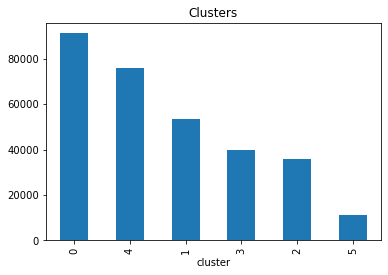

In [31]:
optimal_clusters = [4 , 5, 6]
for i in optimal_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data.to_numpy())
    data['cluster'] = labels
    data['cluster'] = data['cluster'].astype('category')
    print(data['cluster'].value_counts())
    data['cluster'].value_counts().plot(kind='bar')
    plt.title('Clusters')
    plt.show()

cluster
0    99584
2    98071
3    56239
4    40510
1    13106
Name: count, dtype: int64


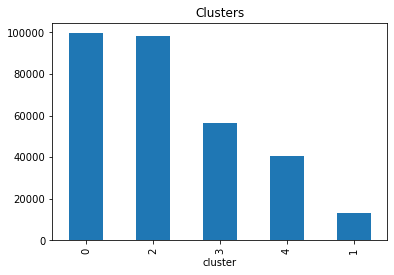

In [37]:
optimal_clusters_num = 5
kmeans = KMeans(n_clusters=optimal_clusters_num, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data.to_numpy())
data['cluster'] = labels
data['cluster'] = data['cluster'].astype('category')
print(data['cluster'].value_counts())
data['cluster'].value_counts().plot(kind='bar')
plt.title('Clusters')
plt.show()
clusters = []
for i in range(optimal_clusters_num):
    clusters.append(data[data['cluster'] == i])

In [41]:
# show cluster TAGET distribution 
col = 'NAME_EDUCATION_TYPE'
for i in range(optimal_clusters_num):
    print('Cluster ' + str(i))
    print(clusters[i][col].value_counts() * 100 / clusters[i].shape[0])

Cluster 0
NAME_EDUCATION_TYPE
4    70.155848
1    25.218911
2     3.546754
3     1.021248
0     0.057238
Name: count, dtype: float64
Cluster 1
NAME_EDUCATION_TYPE
4    51.716771
1    44.689455
2     3.105448
3     0.373875
0     0.114451
Name: count, dtype: float64
Cluster 2
NAME_EDUCATION_TYPE
4    72.322093
1    22.208400
2     4.362146
3     1.067594
0     0.039767
Name: count, dtype: float64
Cluster 3
NAME_EDUCATION_TYPE
4    66.197834
1    29.940077
2     3.010366
3     0.780597
0     0.071125
Name: count, dtype: float64
Cluster 4
NAME_EDUCATION_TYPE
4    82.922735
1    13.019008
3     3.120217
2     0.905949
0     0.032091
Name: count, dtype: float64
